<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [8]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [9]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [13]:
# Answer:
movies.sort_values(by = ['duration'], ascending = True)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

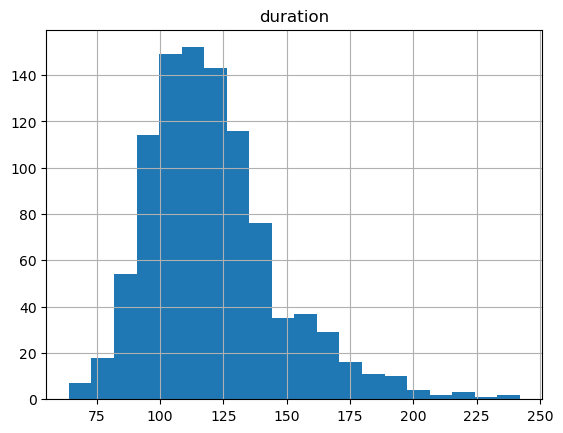

In [22]:
# Answer:
movies.hist(['duration'], bins = 20)

#### Use a box plot to display that same data.

<AxesSubplot:>

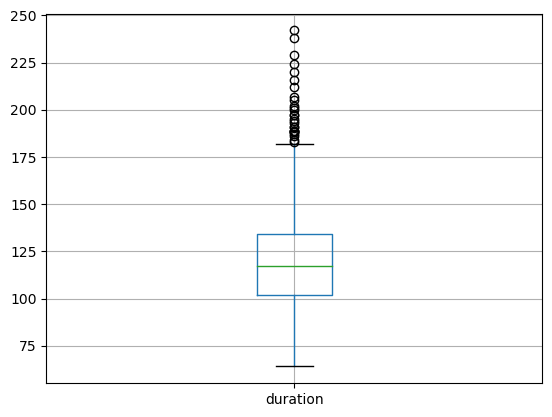

In [23]:
# Answer:
movies.boxplot(['duration'])

## Intermediate level

#### Count how many movies have each of the content ratings.

In [31]:
# Answer:
movies['content_rating'].value_counts(dropna=False)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
NaN            3
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Content Rating')

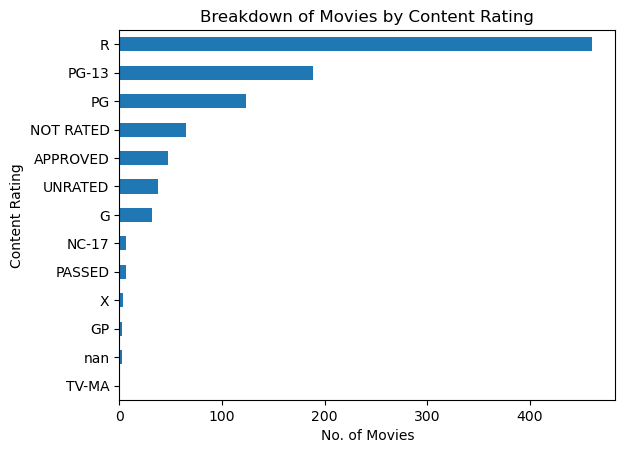

In [54]:
# Answer:
content_rating_count = movies['content_rating'].value_counts(dropna=False)
content_rating_count_sorted = content_rating_count.sort_values(ascending = True)
content_rating_count_sorted.plot(kind="barh")
plt.title("Breakdown of Movies by Content Rating")
plt.xlabel("No. of Movies")
plt.ylabel("Content Rating")


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [61]:
# Answer:
content_rating = movies['content_rating']
replaced_content_rating = content_rating.replace({"NOT RATED": "UNRATED", "APPROVED":"UNRATED", "PASSED":"UNRATED", "GP":"UNRATED"})
replaced_content_rating_count = replaced_content_rating.value_counts(dropna=False)
replaced_content_rating_count

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
NaN          3
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [62]:
# Answer:
content_rating = movies['content_rating']
replaced_content_rating = content_rating.replace({"X": "NC-17", "TV-MA":"NC-17"})
replaced_content_rating_count = replaced_content_rating.value_counts(dropna=False)
replaced_content_rating_count

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17         12
PASSED         7
NaN            3
GP             3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [70]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [73]:
# Answer:
content_rating = movies['content_rating']
replaced_content_rating = content_rating.fillna(value ="UNRATED")
replaced_content_rating_count = replaced_content_rating.value_counts(dropna=False)
replaced_content_rating_count

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       41
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [93]:
# Answer:
movies_above_equal_2_hours_check = movies['duration'] >= 120
movies_above_equal_2_hours = movies[movies_above_equal_2_hours_check]
average_star_movies_above_equal_2_hours = movies_above_equal_2_hours['star_rating'].mean()
print(average_star_movies_above_equal_2_hours)

movies_less_2_hours_check = movies['duration'] < 120
movies_less_2_hours = movies[movies_less_2_hours_check]
average_star_movies_less_2_hours = movies_less_2_hours['star_rating'].mean()
print(average_star_movies_less_2_hours)

if average_star_movies_above_equal_2_hours == average_star_movies_less_2_hours:
    print("The average star rating for movies 2 hours or longer is equal to the average star rating for movies shorter than 2 hours")
elif average_star_movies_above_equal_2_hours > average_star_movies_less_2_hours:
    print("The average star rating for movies 2 hours or longer is more than the average star rating for movies shorter than 2 hours")
else:
    print("The average star rating for movies 2 hours or longer is less than the average star rating for movies shorter than 2 hours")

7.948898678414082
7.838666666666657
The average star rating for movies 2 hours or longer is more than the average star rating for movies shorter than 2 hours


#### Use a visualization to detect whether there is a relationship between duration and star rating.

<AxesSubplot:xlabel='duration', ylabel='star_rating'>

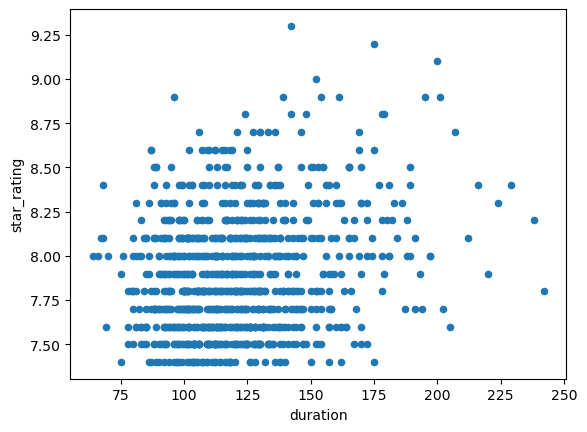

In [129]:
# Answer:
duration = movies['duration']
star_rating = movies['star_rating']
movies.plot(kind = 'scatter', x='duration', y = 'star_rating')
#there does not seem to be a relationship between duration and star rating

#### Calculate the average duration for each genre.

In [160]:
# Answer:
average_duration_by_genre = movies.groupby('genre')['duration'].mean()
average_duration_by_genre


genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

In [219]:
# As a scatter plot only accepts numbers, the categories in content rating need to be first
# converted into numbers before the relationship can be compared
translated_content_rating = movies.content_rating.astype("category").cat.codes
translated_content_rating = pd.DataFrame(translated_content_rating)
merged_table = pd.merge(translated_content_rating, movies, left_index=True, right_index=True)
merged_table = merged_table.rename(columns = {0: 'translated_content_rating'})
merged_table_translation = merged_table[['translated_content_rating','content_rating']]
merged_table_translation = merged_table_translation.drop_duplicates(subset = ['translated_content_rating', 'content_rating']).reset_index(drop = True)
merged_table_translation.sort_values(by = ['translated_content_rating'])

,translated_content_rating,content_rating
9,-1,NaN
5,0,APPROVED
7,1,G
11,2,GP
12,3,NC-17
2,4,NOT RATED
6,5,PASSED
3,6,PG
1,7,PG-13
0,8,R


<AxesSubplot:xlabel='duration', ylabel='translated_content_rating'>

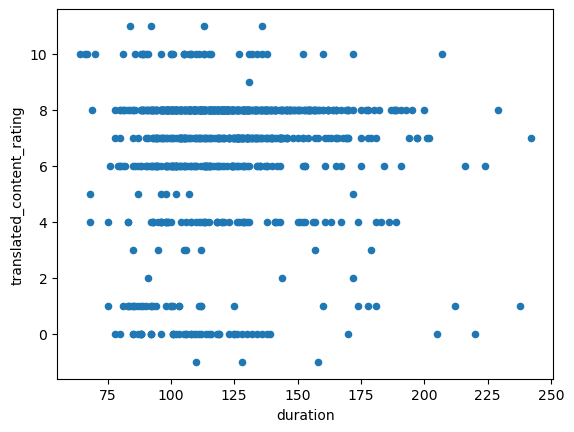

In [204]:
merged_table.plot(kind = 'scatter' , x = 'duration', y = 'translated_content_rating')

# From the scatter plot, there does not seem to be a correlation between content rating 
# and duration

#### Determine the top rated movie (by star rating) for each genre.

In [38]:
# A table containing the highest star_rating by genre is first obtained
top_rated_movies = movies.groupby(['genre'])['star_rating'].max()
key_table = pd.DataFrame(top_rated_movies)
key_table = key_table.reset_index()
key_table

,genre,star_rating
0,Action,9.0
1,Adventure,8.9
2,Animation,8.6
3,Biography,8.9
4,Comedy,8.6
5,Crime,9.3
6,Drama,8.9
7,Family,7.9
8,Fantasy,7.7
9,Film-Noir,8.3


In [42]:
# A unique key is then obtained by concatenating the genre with star_rating.
# The objective is to use this key to do an inner join with the original movies dataset
# to get the titles of the movies that match the genre and star_rating condition.
key_table['key'] = key_table["genre"] + "-" + key_table["star_rating"].astype(str)
key_table

,genre,star_rating,key
0,Action,9.0,Action-9.0
1,Adventure,8.9,Adventure-8.9
2,Animation,8.6,Animation-8.6
3,Biography,8.9,Biography-8.9
4,Comedy,8.6,Comedy-8.6
5,Crime,9.3,Crime-9.3
6,Drama,8.9,Drama-8.9
7,Family,7.9,Family-7.9
8,Fantasy,7.7,Fantasy-7.7
9,Film-Noir,8.3,Film-Noir-8.3


In [43]:
# A unique key with the same format is created in the movies dataset by concatenating 
# the genre with star_rating.
movies['key'] = movies["genre"] + "-" + movies["star_rating"].astype(str)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,key
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Crime-9.3
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",Crime-9.2
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",Crime-9.1
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",Action-9.0
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",Crime-8.9


In [59]:
# An inner join merge is done on both datasets using the common key and irrelevant columns drops.
# The final output shows the top rated movie (by star rating) for each genre.
# Of note, the comedy and drama genres have more than one title with the highest star rating.
merged_table = pd.merge(key_table,movies)
#merged_table.shape
merged_table.drop(['key', 'content_rating', 'duration', 'actors_list'], axis =1)

,genre,star_rating,title
0,Action,9.0,The Dark Knight
1,Adventure,8.9,The Lord of the Rings: The Return of the King
2,Animation,8.6,Spirited Away
3,Biography,8.9,Schindler's List
4,Comedy,8.6,Life Is Beautiful
5,Comedy,8.6,City Lights
6,Comedy,8.6,Modern Times
7,Crime,9.3,The Shawshank Redemption
8,Drama,8.9,12 Angry Men
9,Drama,8.9,Fight Club


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [3]:
# A table containing the count by title is first obtained
filtered_movies = movies['title'].value_counts(dropna=False)
pd.DataFrame(filtered_movies)

# The table is then filtered to show only titles where the count is > 1 (i.e. duplicate values)
filtered_movies = pd.DataFrame(filtered_movies).reset_index()
filtered_movies = filtered_movies.rename(columns = {'index': 'title', 'title': 'count'})
filtered_movies = filtered_movies[filtered_movies['count'] > 1]

# An innner join merge is done between the filtered_movies table and the original movies table 
# using titles as the common key to obtain other details of the duplicate titles for comparison
merged_table = pd.merge(filtered_movies,movies)
merged_table

# They are not duplicates as they have different values in the other columns.
# For instance, the two Dracula movies have different values in the actors_list.
# The two True Grit films have different durations.

,title,count,star_rating,content_rating,genre,duration,actors_list
0,Dracula,2,7.6,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
1,Dracula,2,7.5,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
2,The Girl with the Dragon Tattoo,2,7.9,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
3,The Girl with the Dragon Tattoo,2,7.8,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
4,Les Miserables,2,7.7,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
5,Les Miserables,2,7.5,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
6,True Grit,2,7.7,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
7,True Grit,2,7.4,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [110]:
# Answer:
q1_filtered_movies = movies['genre'].value_counts(dropna=False)
q1_filtered_movies

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [111]:
q1_filtered_movies = {'genre': ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery'], 'count': [278, 156, 136, 124, 77, 75, 62, 29, 16]}
q1_filtered_movies = pd.DataFrame(data=q1_filtered_movies)
q1_filtered_movies

,genre,count
0,Drama,278
1,Comedy,156
2,Action,136
3,Crime,124
4,Biography,77
5,Adventure,75
6,Animation,62
7,Horror,29
8,Mystery,16


In [112]:
q1_merged_table = pd.merge(q1_filtered_movies,movies)
q1_average_star_rating = merged_table.groupby('genre')['star_rating'].mean()
q1_average_star_rating

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [109]:
# Answer:
q2_filtered_movies = movies['genre'].value_counts(dropna=False)
pd.DataFrame(q2_filtered_movies)
q2_filtered_movies = pd.DataFrame(q2_filtered_movies).reset_index()
q2_filtered_movies = q2_filtered_movies.rename(columns = {'index': 'genre', 'genre': 'count'})
q2_filtered_movies = q2_filtered_movies[q2_filtered_movies['count'] >= 10 ]

q2_merged_table = pd.merge(q2_filtered_movies,movies)
q2_average_star_rating = merged_table.groupby('genre')['star_rating'].mean()
q2_average_star_rating

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [138]:
# Answer:
q3_average_star_rating = movies.groupby('genre')['star_rating'].mean()
q3_average_star_rating = pd.DataFrame(q3_average_star_rating).reset_index()
q3_average_star_rating

,genre,star_rating
0,Action,7.884559
1,Adventure,7.933333
2,Animation,7.914516
3,Biography,7.862338
4,Comedy,7.822436
5,Crime,7.916935
6,Drama,7.902518
7,Family,7.850000
8,Fantasy,7.700000
9,Film-Noir,8.033333


In [139]:
q3_average_star_rating_check = movies['genre'].value_counts() >= 10
q3_average_star_rating_check = pd.DataFrame(q3_average_star_rating_check).reset_index()
q3_average_star_rating_check = q3_average_star_rating_check.rename(columns = {'index': 'genre', 'genre': 'filter'})
q3_average_star_rating_check = q3_average_star_rating_check[q3_average_star_rating_check['filter'] == True ]
q3_average_star_rating_check

,genre,filter
0,Drama,True
1,Comedy,True
2,Action,True
3,Crime,True
4,Biography,True
5,Adventure,True
6,Animation,True
7,Horror,True
8,Mystery,True


In [140]:
q3_merged_table = pd.merge(q3_average_star_rating,q3_average_star_rating_check)
q3_merged_table

,genre,star_rating,filter
0,Action,7.884559,True
1,Adventure,7.933333,True
2,Animation,7.914516,True
3,Biography,7.862338,True
4,Comedy,7.822436,True
5,Crime,7.916935,True
6,Drama,7.902518,True
7,Horror,7.806897,True
8,Mystery,7.975000,True


#### Option 4: aggregate by count and mean, then filter using the count

In [149]:
# Answer:
q4_filtered_movies = movies.groupby('genre').star_rating.agg(['count', 'mean'])
q4_filtered_movies = q4_filtered_movies[q4_filtered_movies['count'] >=10 ]
q4_filtered_movies


,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [3]:
# The "actors_list" column is not be a list column by default and so needed to be
# coverted to one before the table could be expanded by creating one row per actor
movies["actors_list"] = movies["actors_list"].replace({'\[':'', '\]':'', 'u' : '', "'" : "", ', ' : ',', '"' : ''}, regex=True)
movies["actors_list"] = movies["actors_list"].str.split(",")

# To check whether the actors_list column had been converted to a list
print (type(movies.loc[0, 'actors_list']))
a = (movies.applymap(type) == list).all()
print (a)

<class 'list'>
star_rating       False
title             False
content_rating    False
genre             False
duration          False
actors_list        True
dtype: bool


In [4]:
# Creates a new row for every value in the actors_list list with the values in the other
# columns duplicated
expanded_movies = movies.explode("actors_list")

In [5]:
expanded_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins
0,9.3,The Shawshank Redemption,R,Crime,142,Morgan Freeman
0,9.3,The Shawshank Redemption,R,Crime,142,Bob Gnton
1,9.2,The Godfather,R,Crime,175,Marlon Brando
1,9.2,The Godfather,R,Crime,175,Al Pacino
...,...,...,...,...,...,...
977,7.4,Poltergeist,PG,Horror,114,Heather ORorke
977,7.4,Poltergeist,PG,Horror,114,Craig T. Nelson
978,7.4,Wall Street,R,Crime,126,Charlie Sheen
978,7.4,Wall Street,R,Crime,126,Michael Doglas


In [6]:
actor_count = expanded_movies['actors_list']
actor_count = actor_count.value_counts(dropna=False)
actor_count.head(20)
#Robert De Niro is the most mentioned actor in the dataset

Robert De Niro       18
Clint Eastwood       14
Brad Pitt            14
Tom Hanks            14
Al Pacino            13
Johnny Depp          12
Leonardo DiCaprio    11
Christian Bale       11
Dstin Hoffman        11
James Stewart        10
Harrison Ford        10
Denzel Washington    10
Jlianne Moore        10
Jack Nicholson        9
Sean Connery          9
Ethan Hawke           9
Rssell Crowe          9
Ed Harris             9
Morgan Freeman        8
Sean Penn             8
Name: actors_list, dtype: int64